Setup

In [17]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

LOAD_FILES = true

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('Fashion-MNIST', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

(-0.5, 27.5, 27.5, -0.5)

Saving figure some_digit_plot


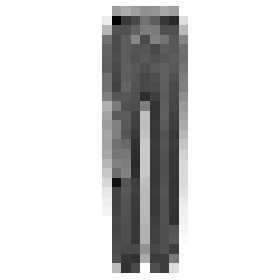

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[1000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [81]:
import matplotlib as mpl
import matplotlib.pyplot as plt

output_labels = ["top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
y = y.astype(np.uint8)

def OutputToLabel(output):
    return output_labels[output]

def IdToString(id):
    return output_labels[y[id]]

def ShowImage(id, size = 28):
    some_digit = X[id]
    some_digit_image = some_digit.reshape(size, int(784 / size))

    #lol that looks easy like a shoe so i guess an alhgorithem should detect it too!
    plt.imshow(some_digit_image, cmap="binary")
    plt.axis("off")
    plt.show()
    print(IdToString(id), id)

Ankle boot


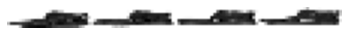

Ankle boot 0


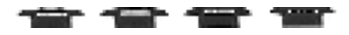

top 1


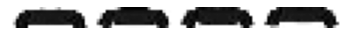

Pullover 7


In [83]:
ShowImage(0, 7)
ShowImage(1, 7)
ShowImage(7, 7)

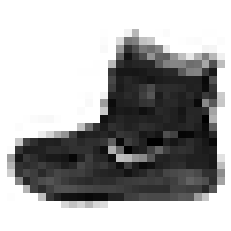

Ankle boot 0


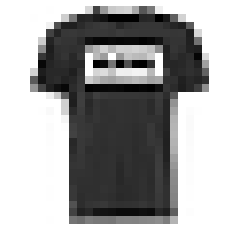

top 1


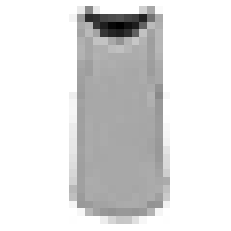

top 2


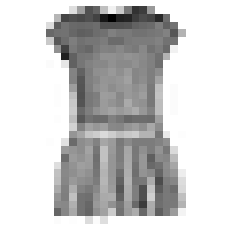

Dress 3


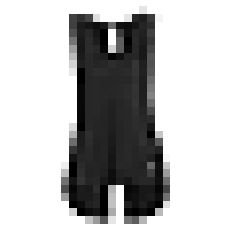

top 4


In [84]:
for i in range(0, 5):
    ShowImage(i)

In [87]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [90]:
y_train_pullover = (y_train == 2) # True for all 5s, False for all other digits
y_test_pullover = (y_test == 2)


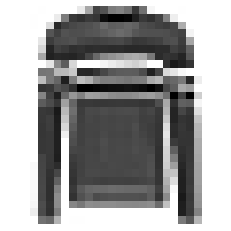

Pullover 5


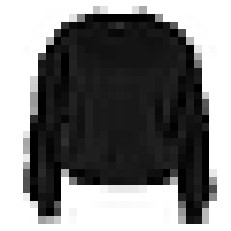

Pullover 7


In [91]:
for i in range(0, 10):
    #y_test_pullover[i]
    if(y_train_pullover[i] == True):
        ShowImage(i)
    #y_train_pullover[i]

In [118]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_pullover)

SGDClassifier(random_state=42)

[False  True False ... False False False]


[False  True False ... False False False]


(-0.5, 27.5, 27.5, -0.5)

Saving figure some_digit_plot


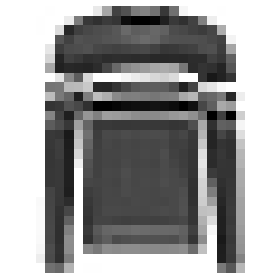

(-0.5, 27.5, 27.5, -0.5)

Saving figure some_digit_plot


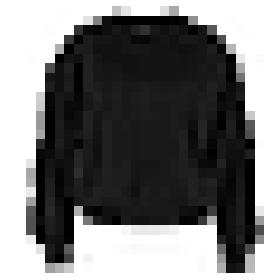

In [121]:
print(y_test_pullover)


for i in range(0, 10):
    if(y_train_pullover[i]):
        some_digit = X_train[i]
        some_digit_image = some_digit.reshape(28, 28)
        plt.imshow(some_digit_image, cmap=mpl.cm.binary)
        plt.axis("off")

        save_fig("some_digit_plot")
        plt.show()

(-0.5, 27.5, 27.5, -0.5)

Saving figure some_digit_plot


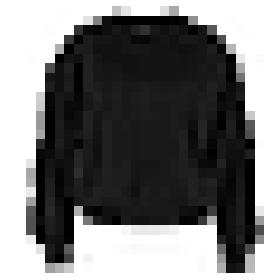

In [115]:
some_digit = X[7]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

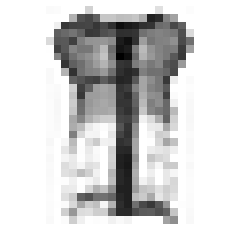

Shirt 127


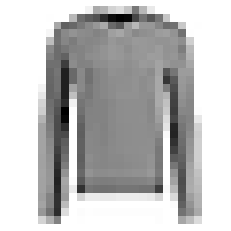

Pullover 262


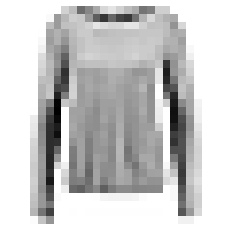

Pullover 291


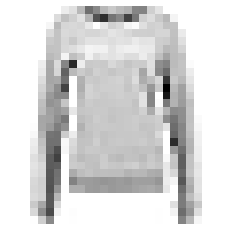

Pullover 400


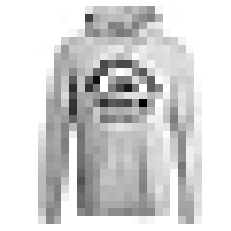

Pullover 449


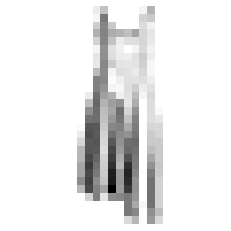

Dress 478


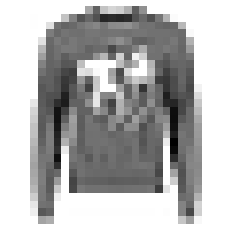

Pullover 483


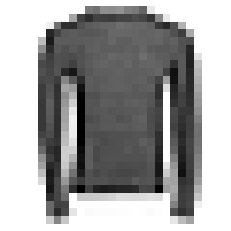

Pullover 973


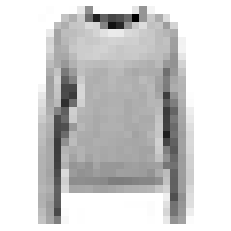

Pullover 989


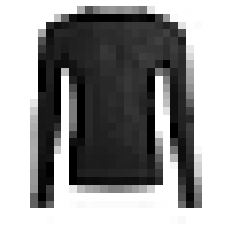

Pullover 1001


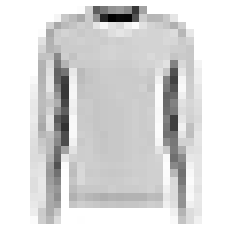

Pullover 1044


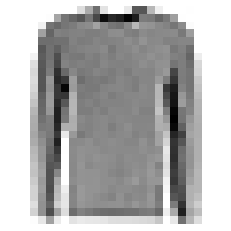

Pullover 1054


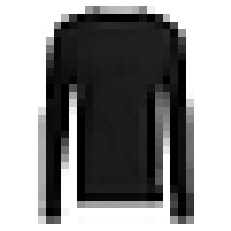

Pullover 1107


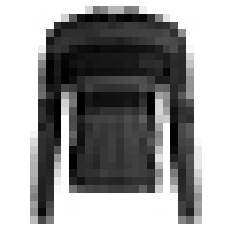

Pullover 1345


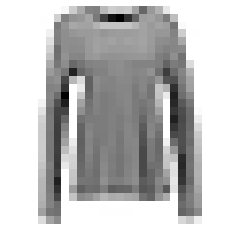

Pullover 1386


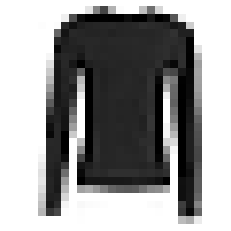

Pullover 1568


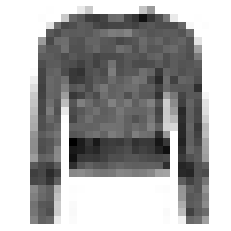

Pullover 1606


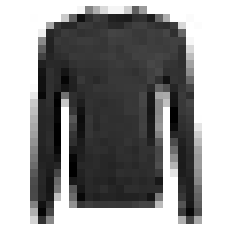

Pullover 1649


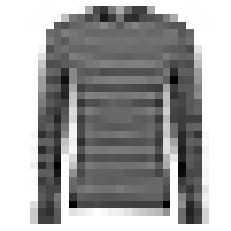

Pullover 1793


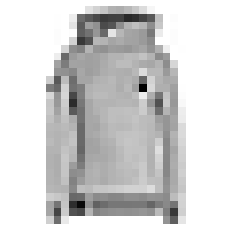

Pullover 1804


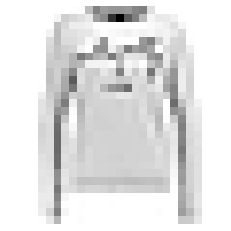

Pullover 1892


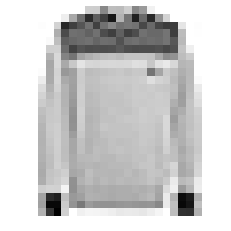

Pullover 1946


In [140]:
some_digit = X[7]
arr = []

r = 2000
for i in range(0, r):
    #y_test_pullover[i]
    arr.insert(i, X[i])
arr = sgd_clf.predict(arr)
#print(arr)
for i in range(0, r):
    if(arr[i]):
        ShowImage(i)

# sgd_clf.predict([X[127]])
# ShowImage(127)

In [101]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_pullover, cv=3, scoring="accuracy")

array([0.9345 , 0.93565, 0.91235])

In [142]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_pullover):
    clone_clf = clone(sgd_clf)
    x_train_folds = X_train[train_index]
    y_train_folds = y_train_pullover[train_index]

    x_test_folds = X_train[test_index]
    y_test_folds = y_train_pullover[test_index]

    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

SGDClassifier(random_state=42)

0.9345


SGDClassifier(random_state=42)

0.93565


SGDClassifier(random_state=42)

0.91235


Even the most shitty predictor has accuracity of 90% one that classify everything as false.

In [143]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_pullover, cv=3, scoring="accuracy")

array([0.9009 , 0.90235, 0.89675])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_pullover, cv=3)

In [149]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_pullover, y_train_pred)

array([[51813,  2187],
       [ 2163,  3837]], dtype=int64)

In [151]:
y_train_perfect_predictions = y_train_pullover
confusion_matrix(y_train_pullover, y_train_perfect_predictions)

array([[54000,     0],
       [    0,  6000]], dtype=int64)

In [161]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_pullover, y_train_pred)

print("presicion : ", cm[1,1] / (cm[1,1] + cm[0, 1]) , " Recall : " , cm[1,1] / (cm[1,1] + cm[1, 0]))

presicion :  0.6369521912350598  Recall :  0.6395


In [162]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pullover, y_train_pred)
recall_score(y_train_pullover, y_train_pred)

0.6369521912350598

0.6395

In [166]:
from sklearn.metrics import f1_score
f1_score(y_train_pullover, y_train_pred)

0.6382235528942116

0.6382260956175299
